In [55]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date
import file

In [56]:
all_option_leverage = file.load_all_option_leverage()

In [57]:
start_date = '2021-1-1'
history_map = {}
for symbol in all_option_leverage:
    tickerData = yf.Ticker(symbol)
    history = tickerData.history(interval='1wk', start=start_date, end=date.today()) # prices are adjusted for splits
    print(f'{symbol} history: {len(history)}w')
    history_map[symbol] = history

USD history: 190w
SMH history: 190w
NVDA history: 190w


SOXL history: 190w
TQQQ history: 190w
MAGS history: 71w
MAGX history: 25w


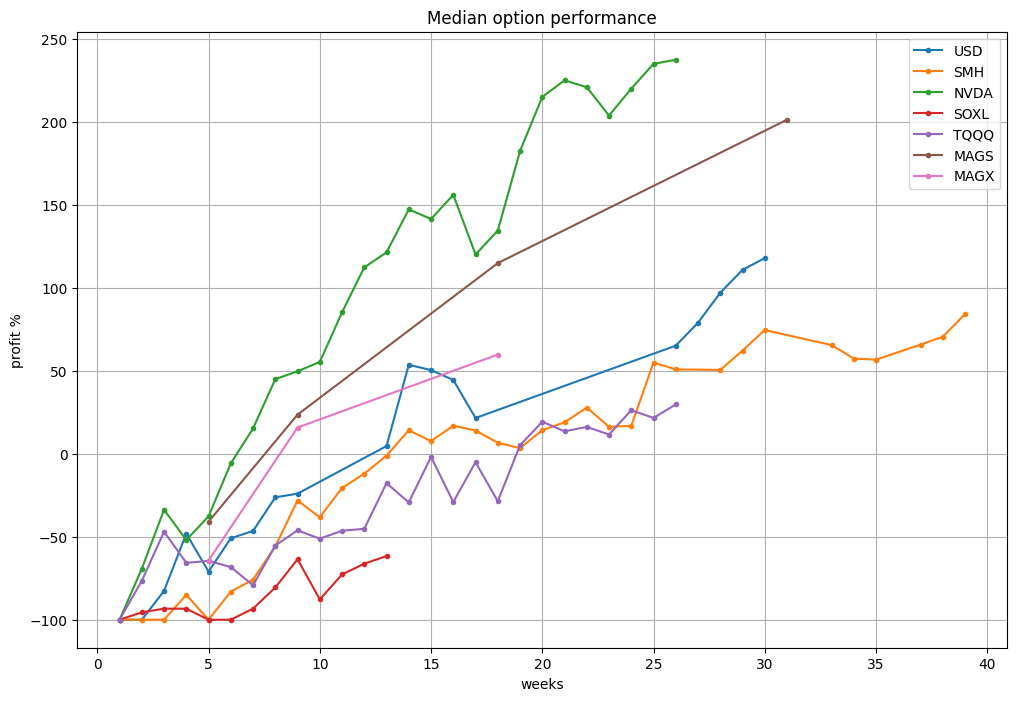

In [58]:
max_weeks = 52
gap = 1.5 # %

plt.figure(figsize=(12,8))

for symbol, history in history_map.items():
    data = {}
    option_leverage = all_option_leverage[symbol]
    for weeks, lvr in option_leverage.items():
        stock_changes = history['Close'].pct_change(periods=weeks) * 100
        option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
        profit = option_profits.median()
        data[weeks] = profit
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Median option performance')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

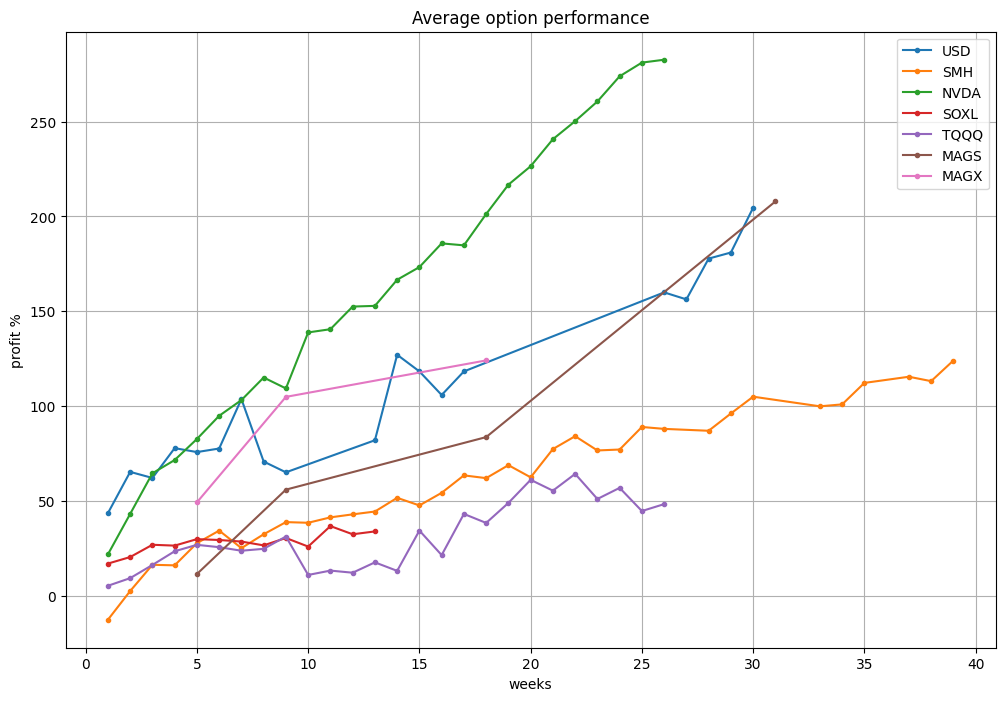

In [59]:
max_weeks = 52
gap = 1.5 # %

plt.figure(figsize=(12,8))

for symbol, history in history_map.items():
    data = {}
    option_leverage = all_option_leverage[symbol]
    for weeks, lvr in option_leverage.items():
        stock_changes = history['Close'].pct_change(periods=weeks) * 100
        option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
        profit = option_profits.mean()
        data[weeks] = profit
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Average option performance')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()